Class label frequencies

Training Dataset:
Class 1 samples: 31.69%
Class 2 samples: 38.73%
Class 3 samples: 29.58%

Test Dataset:
Class 1 samples: 38.89%
Class 2 samples: 44.44%
Class 3 samples: 16.67%


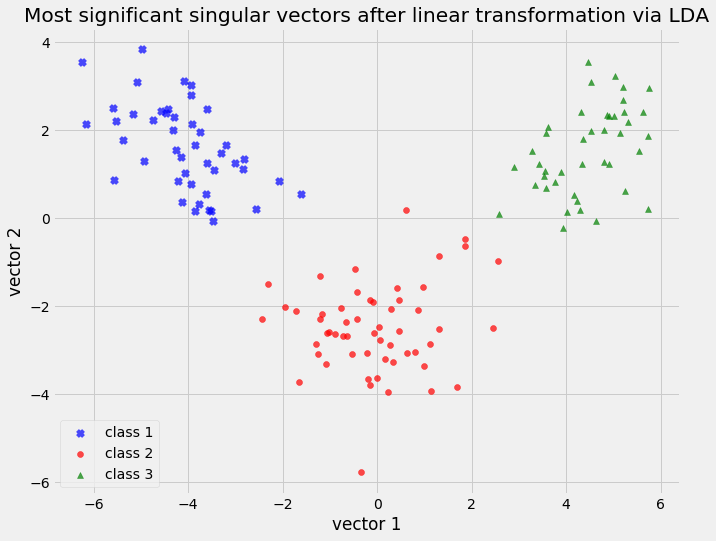

[1.         0.9375     0.93333333 1.         1.         1.
 1.         1.         1.         1.        ]


Prediction accuracy for the test dataset
97.22%

Prediction accuracy for the training dataset
100.00%

Prediction accuracy for the test dataset
97.22%

Confusion Matrix of the SGD-classifier
[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]


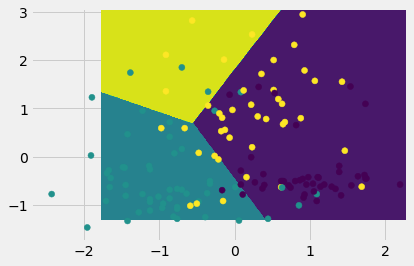

In [37]:
#libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

winedata = pd.read_csv('Wine.csv')
X = winedata.iloc[:, 0:13].values
y = winedata.iloc[:, 13].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Scale down data
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

print('Class label frequencies')

print('\nTraining Dataset:')    
for l in range(1,4):
    print('Class {:} samples: {:.2%}'.format(l, list(y_train).count(l)/y_train.shape[0]))

print('\nTest Dataset:')     
for l in range(1,4):
    print('Class {:} samples: {:.2%}'.format(l, list(y_test).count(l)/y_test.shape[0]))

    
#------------- LDA visualization-------------# 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
sklearn_lda = LDA(n_components=2)
transf_lda = sklearn_lda.fit_transform(X_train, y_train)

plt.figure(figsize=(10,8))

for label,marker,color in zip(
        range(1,4),('x', 'o', '^'),('blue', 'red', 'green')):


    plt.scatter(x=transf_lda[:,0][y_train == label],
                y=transf_lda[:,1][y_train == label],
                marker=marker,
                color=color,
                alpha=0.7,
                label='class {}'.format(label)
                )

plt.xlabel('vector 1')
plt.ylabel('vector 2')

plt.legend()
plt.title('Most significant singular vectors after linear transformation via LDA')

plt.show()

#------------------------------------KFOLD---------------------------#

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=300, random_state=0)

from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)

print(all_accuracies)

#------------------------------------LDA as Linear Classifier --------------------------#
lda_clf = LDA()
lda_clf.fit(X_train, y_train)
LDA(n_components=None, priors=None)

from sklearn import metrics
pred_train_lda = lda_clf.predict(X_train)

pred_test_lda = lda_clf.predict(X_test)

print('\n\nPrediction accuracy for the test dataset')
print('{:.2%}'.format(metrics.accuracy_score(y_test, pred_test_lda)))

#----------------------LDA-Classifier Predictions w/Confusion Matrix ----------------------#

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train)

pred_train_sgd = sgd_clf.predict(X_train)
pred_test_sgd = sgd_clf.predict(X_test)

print('\nPrediction accuracy for the training dataset')
print('{:.2%}\n'.format(metrics.accuracy_score(y_train, pred_train_sgd)))

print('Prediction accuracy for the test dataset')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_sgd)))

print('Confusion Matrix of the SGD-classifier')
print(metrics.confusion_matrix(y_test, sgd_clf.predict(X_test)))


#------------------------------------Decision Regions Graph --------------------------#
sgd_clf2 = SGDClassifier()
sgd_clf2.fit(X_train[:, :2], y_train)

x_min = X_test[:, 0].min()  
x_max = X_test[:, 0].max()
y_min = X_test[:, 1].min()
y_max = X_test[:, 1].max()

step = 0.01
X, Y = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

Z = sgd_clf2.predict(np.c_[X.ravel(), Y.ravel()])
Z = Z.reshape(X.shape)

# Plots decision regions
plt.contourf(X, Y, Z)


# Plots samples from training data set
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.show()
